<a href="https://colab.research.google.com/github/Bsyamsundar/Prostatexproject/blob/master/Prostatexproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.1 MB/s eta 0:00:00


In [4]:
!pip install scikit-image

In [5]:
!pip install pydicom matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.4 MB/s eta 0:00:00


In [6]:
import os
import pydicom
import matplotlib.pyplot as plt

In [7]:
def display_dicom_images(image_paths, num_images=2):
    for i in range(min(num_images, len(image_paths))):
        dicom_file = pydicom.dcmread(image_paths[i])
        image_data = dicom_file.pixel_array
        plt.figure(figsize=(5, 5))
        plt.imshow(image_data, cmap='gray')
        plt.title(f'Image {i+1}: {os.path.basename(image_paths[i])}')
        plt.axis('off')
        plt.show()


In [8]:
base_dir = "/content/drive/MyDrive/PROSTATEx/ProstateX-0201"

In [9]:
t2_image_paths = []

In [10]:
def collect_t2_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if 't2' in root.lower() and file.endswith('.dcm'):
                t2_image_paths.append(os.path.join(root, file))

In [11]:
collect_t2_images(base_dir)

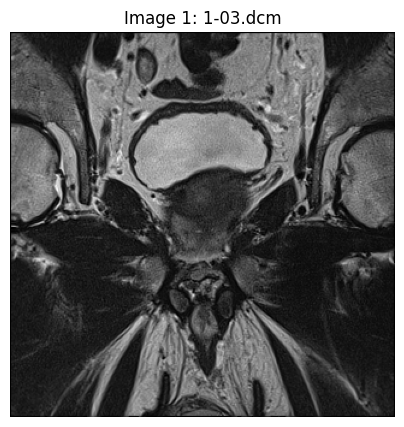

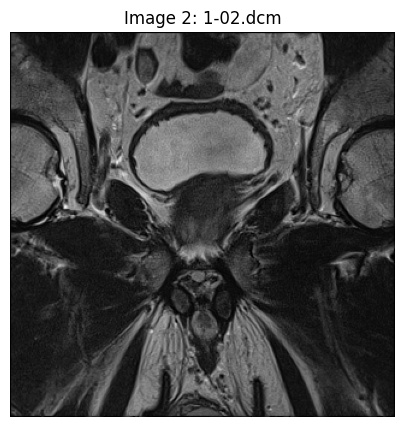

In [12]:
display_dicom_images(t2_image_paths)

In [13]:
import pandas as pd

findings_df = pd.read_csv('/content/drive/MyDrive/ProstateX-Findings-Train.csv')
images_df = pd.read_csv('/content/drive/MyDrive/ProstateX-Images-Train.csv')

In [14]:
print("Columns in Findings DataFrame:")
print(findings_df.columns)

print("\nColumns in Images DataFrame:")
print(images_df.columns)

Columns in Findings DataFrame:
Index(['ProxID', 'fid', 'pos', 'zone', 'ClinSig'], dtype='object')

Columns in Images DataFrame:
Index(['ProxID', 'Name', 'fid', 'pos', 'WorldMatrix', 'ijk', 'TopLevel',
       'SpacingBetweenSlices', 'VoxelSpacing', 'Dim', 'DCMSerDescr',
       'DCMSerNum'],
      dtype='object')


In [15]:
findings_df.head()

,ProxID,fid,pos,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,PZ,True
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,PZ,False
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,TZ,False


In [16]:
images_df.head()

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8


In [17]:
base_dir = "/content/drive/MyDrive/PROSTATEx"

In [18]:
t2_image_paths = []

In [19]:
def collect_t2_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if 't2' in root.lower() and file.endswith('.dcm'):
                t2_image_paths.append(os.path.join(root, file))

In [20]:
collect_t2_images(base_dir)

In [21]:
len(t2_image_paths)

14523

In [29]:
t2_image_paths[-10:-1]

['/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-15.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-06.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-03.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-13.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-08.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-10.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MC

In [24]:
def filter_t2_images(images_df):
    t2_images_df = images_df[images_df['DCMSerDescr'].str.contains('t2', case=False, na=False)]
    return t2_images_df


In [25]:
t2_images_df = filter_t2_images(images_df)

In [26]:
t2_images_df.head()

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
5,ProstateX-0000,t2_tse_cor0,1,25.7457 31.8707 -38.511,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0000,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
6,ProstateX-0000,t2_tse_sag0,1,25.7457 31.8707 -38.511,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6000,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
7,ProstateX-0000,t2_tse_tra0,1,25.7457 31.8707 -38.511,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0000,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
14,ProstateX-0001,t2_loc_sag0,1,-40.5367071921656 29.320722668457 -16.70766907...,"0,0,-10.5,-7.38253,1.5625,0,0,-167.046,0,-1.56...",126 145 3,1.0,10.5000,"1.5625,1.5625,10.5",256x256x3x1,t2_loc sag,3
15,ProstateX-0001,t2_localizer0,1,-40.5367071921656 29.320722668457 -16.70766907...,"0,0,-55.4762,17.2381,1.5625,0,0,-200.781,0,-1....",147 139 1,1.0,55.4762,"1.5625,1.5625,55.4762",256x256x13x1,t2_localizer,1
